#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumGothic')
sns.set(font="NanumGothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

* 함수 생성

In [44]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [45]:
# 구글 코랩 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data = pd.read_csv('/content/drive/MyDrive/미니프로젝트5차part2/2023.10.25_미니프로젝트5차_실습자료밀 데이터/데이터/data01_train.csv')

In [47]:
from joblib import load

In [48]:
# 탐색적 데이터 분석에서 관점 1 ~ 관점 8까지 상위 5개 feautre를 추출해서 나온 feature
vv = load('/content/drive/MyDrive/미니프로젝트5차part2/2023.10.25_미니프로젝트5차_실습자료밀 데이터/데이터/variables.pkl')

In [49]:
vv # 최적의 변수 출력

['tBodyAcc-energy()-X',
 'angle(X,gravityMean)',
 'tBodyGyroJerk-iqr()-Z',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-min()-X',
 'tGravityAcc-max()-Y',
 'tBodyAccMag-std()',
 'tBodyGyroJerk-mad()-X',
 'fBodyAccMag-sma()',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-min()-Y',
 'fBodyAcc-mad()-X',
 'tGravityAcc-mean()-Y',
 'angle(Y,gravityMean)',
 'fBodyAccMag-std()',
 'tGravityAccMag-std()',
 'tGravityAcc-mean()-X',
 'tBodyAccJerk-mad()-X',
 'fBodyAcc-energy()-X',
 'tBodyAcc-max()-X',
 'tBodyAccJerk-mad()-Y',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-energy()-X',
 'tGravityAcc-max()-X',
 'fBodyAcc-meanFreq()-Z',
 'tBodyAccJerk-iqr()-Y',
 'tGravityAcc-arCoeff()-Z,2']

In [50]:
data2 = data.copy()

In [51]:
# data를 copy해서 data2로 명명한다.

data2 = data2[vv + ['Activity']] # 해당 변수만 남겨둔다.

In [52]:
data2.head()

,tBodyAcc-energy()-X,"angle(X,gravityMean)",tBodyGyroJerk-iqr()-Z,"tGravityAcc-arCoeff()-Z,3",tGravityAcc-min()-X,tGravityAcc-max()-Y,tBodyAccMag-std(),tBodyGyroJerk-mad()-X,fBodyAccMag-sma(),tGravityAcc-mean()-Z,...,fBodyAcc-energy()-X,tBodyAcc-max()-X,tBodyAccJerk-mad()-Y,"tGravityAcc-arCoeff()-X,1",tGravityAcc-energy()-X,tGravityAcc-max()-X,fBodyAcc-meanFreq()-Z,tBodyAccJerk-iqr()-Y,"tGravityAcc-arCoeff()-Z,2",Activity
0,-0.999869,-0.601120,-0.986843,-0.385893,0.891969,-0.370494,-0.981876,-0.986107,-0.985206,-0.205765,...,-0.999892,-0.929747,-0.981236,-0.425944,0.673768,0.805627,0.168720,-0.979984,0.386323,STANDING
1,-0.999873,0.345205,-0.992360,0.017077,-0.095343,0.873312,-0.990870,-0.992184,-0.989450,0.234498,...,-0.999900,-0.937337,-0.990851,-0.582880,-0.893830,-0.200892,0.196106,-0.990136,-0.019327,LAYING
2,-0.999988,-0.833564,-0.990670,0.015440,0.985606,-0.195671,-0.992562,-0.984787,-0.990805,0.078530,...,-0.999988,-0.942584,-0.972826,-0.112558,0.906252,0.891615,0.489826,-0.976296,-0.044970,STANDING
3,-0.703590,-0.695819,-0.430966,-0.430046,0.943954,-0.309430,-0.459911,-0.363761,-0.407268,-0.129686,...,-0.702831,0.008288,-0.132875,-0.344751,0.805419,0.858160,-0.044306,-0.188099,0.392060,WALKING
4,-0.404271,-0.705029,-0.699558,-0.790986,0.901943,-0.236084,0.152179,-0.554993,0.191831,-0.163806,...,-0.405462,0.584131,-0.423236,-0.702510,0.738738,0.858531,-0.459624,-0.576064,0.780440,WALKING_DOWNSTAIRS


#### 2) 기본 정보 조회

In [53]:
data2.shape

(5881, 28)

## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다.


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [54]:
x2 = data2.drop(['Activity'], axis=1)
y2 = data2['Activity']

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [57]:
print(train_X2.shape, test_X2.shape, train_y2.shape, test_y2.shape)

(4704, 27) (1177, 27) (4704,) (1177,)


### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss2 = StandardScaler()
train_X2 = pd.DataFrame(ss2.fit_transform(train_X2), columns=vv) # 2차원 넘파이 배열에서 데이터프레임으로 변환
test_X2 = pd.DataFrame(ss2.transform(test_X2), columns= vv) # 2차원 넘파이 배열에서 데이터 프레임으로 변환

In [60]:
train_X2.head()

,tBodyAcc-energy()-X,"angle(X,gravityMean)",tBodyGyroJerk-iqr()-Z,"tGravityAcc-arCoeff()-Z,3",tGravityAcc-min()-X,tGravityAcc-max()-Y,tBodyAccMag-std(),tBodyGyroJerk-mad()-X,fBodyAccMag-sma(),tGravityAcc-mean()-Z,...,tBodyAccJerk-mad()-X,fBodyAcc-energy()-X,tBodyAcc-max()-X,tBodyAccJerk-mad()-Y,"tGravityAcc-arCoeff()-X,1",tGravityAcc-energy()-X,tGravityAcc-max()-X,fBodyAcc-meanFreq()-Z,tBodyAccJerk-iqr()-Y,"tGravityAcc-arCoeff()-Z,2"
0,1.749929,-0.786856,0.657569,-0.320835,0.571421,-0.185888,1.974354,0.948373,2.174463,0.059585,...,1.284704,1.755540,1.917551,1.557003,0.036585,0.648021,0.565440,-0.016518,0.890410,0.319387
1,0.264336,0.265351,1.504651,-1.077468,0.018599,-0.748397,1.423632,0.378756,1.115046,-1.825143,...,0.689987,0.268413,0.432297,0.865438,-0.765905,-0.297824,0.069129,-1.636607,1.003291,1.073000
2,1.274022,-0.514390,1.380189,-0.052579,0.547165,-0.703377,1.404893,1.392554,1.807915,0.073704,...,1.775294,1.280225,1.423785,1.448027,1.095351,0.586091,0.529478,1.063988,0.816065,0.042738
3,-0.699380,1.880622,-0.849157,1.346410,-1.849160,-1.264760,-0.924846,-0.829798,-0.904053,2.389703,...,-0.845841,-0.697342,-0.844574,-0.876498,-0.500295,-2.037296,-1.902995,1.243945,-0.858326,-1.274972
4,-0.699954,2.429236,-0.836840,0.776639,-2.598712,1.076635,-0.931836,-0.854783,-0.907048,2.411418,...,-0.850891,-0.697929,-0.859477,-0.878577,-0.587658,-2.022795,-2.671955,0.861845,-0.864461,-0.792234


In [61]:
test_X2.head()

,tBodyAcc-energy()-X,"angle(X,gravityMean)",tBodyGyroJerk-iqr()-Z,"tGravityAcc-arCoeff()-Z,3",tGravityAcc-min()-X,tGravityAcc-max()-Y,tBodyAccMag-std(),tBodyGyroJerk-mad()-X,fBodyAccMag-sma(),tGravityAcc-mean()-Z,...,tBodyAccJerk-mad()-X,fBodyAcc-energy()-X,tBodyAcc-max()-X,tBodyAccJerk-mad()-Y,"tGravityAcc-arCoeff()-X,1",tGravityAcc-energy()-X,tGravityAcc-max()-X,fBodyAcc-meanFreq()-Z,tBodyAccJerk-iqr()-Y,"tGravityAcc-arCoeff()-Z,2"
0,-0.660595,1.925304,-0.521996,-0.734001,-2.044510,2.560839,-0.786687,-0.612332,-0.757737,0.376736,...,-0.726569,-0.691622,-0.855756,-0.570074,-0.537250,-2.049237,-1.897593,-0.021165,-0.550794,0.770374
1,0.346416,-0.565091,1.586948,1.023915,0.524212,-0.450973,1.020699,1.651856,1.211452,-0.767048,...,1.435798,0.349683,1.036752,1.213872,0.774838,0.562955,0.518472,0.446115,0.949603,-1.324018
2,-0.700348,-0.627464,-0.842274,-0.873156,0.589833,-0.621406,-0.886893,-0.844219,-0.889816,-0.322696,...,-0.849450,-0.698308,-0.875834,-0.881312,1.238635,0.652202,0.551011,-1.508630,-0.865531,0.949054
3,-0.699924,2.112416,-0.796876,0.770062,-2.165280,2.579946,-0.914349,-0.790264,-0.882671,0.216377,...,-0.831110,-0.698048,-0.861536,-0.839673,0.389278,-2.080170,-2.227377,1.408006,-0.830449,-0.707080
4,-0.700449,-0.729921,-0.847748,1.311218,0.592923,0.116339,-0.926191,-0.858621,-0.902449,-0.575324,...,-0.857828,-0.698409,-0.882062,-0.886844,1.971977,0.656422,0.552547,0.784687,-0.874795,-1.173101


## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다.
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

### (1) 알고리즘1 : Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

* 전체 변수로 Logistic Regression 진행

In [63]:
train_X2.shape

(4704, 27)

* 상위 n개 변수로 Logistic Regression 진행
  * 5개부터 시작해서 하나씩 하나씩 증가해서 27개까지 사용할 떄까지 모델의 성능을 평가한다.

In [64]:
variable1_len = []
score1 = []
for i in range(5, 28, 1):
    temp_train_X2 = train_X2[train_X2.columns[0:i:1]]
    temp_test_X2 = test_X2[test_X2.columns[0:i:1]]

    lr2 = LogisticRegression()
    lr2.fit(temp_train_X2, train_y2)

    print(f'변수 {i}개일 떄')
    print(f'평가 세트 점수 : {lr2.score(temp_test_X2, test_y2)}')

    variable1_len.append(i)
    score1.append(lr2.score(temp_test_X2, test_y2))

변수 5개일 떄
평가 세트 점수 : 0.8589634664401019


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

변수 6개일 떄
평가 세트 점수 : 0.913338997451147
변수 7개일 떄
평가 세트 점수 : 0.923534409515718


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

변수 8개일 떄
평가 세트 점수 : 0.935429056924384
변수 9개일 떄
평가 세트 점수 : 0.9379779099405268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

변수 10개일 떄
평가 세트 점수 : 0.9345794392523364
변수 11개일 떄
평가 세트 점수 : 0.9345794392523364


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

변수 12개일 떄
평가 세트 점수 : 0.9362786745964317


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 13개일 떄
평가 세트 점수 : 0.9379779099405268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 14개일 떄
평가 세트 점수 : 0.9379779099405268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

변수 15개일 떄
평가 세트 점수 : 0.9345794392523364
변수 16개일 떄
평가 세트 점수 : 0.9345794392523364


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

변수 17개일 떄
평가 세트 점수 : 0.9345794392523364


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 18개일 떄
평가 세트 점수 : 0.9388275276125744
변수 19개일 떄
평가 세트 점수 : 0.9379779099405268
변수 20개일 떄
평가 세트 점수 : 0.9379779099405268

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 21개일 떄
평가 세트 점수 : 0.9405267629566695


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 22개일 떄
평가 세트 점수 : 0.9464740866610025


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 23개일 떄
평가 세트 점수 : 0.9464740866610025


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 24개일 떄
평가 세트 점수 : 0.9464740866610025


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 25개일 떄
평가 세트 점수 : 0.9507221750212405


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변수 26개일 떄
평가 세트 점수 : 0.9515717926932881
변수 27개일 떄
평가 세트 점수 : 0.9524214103653356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


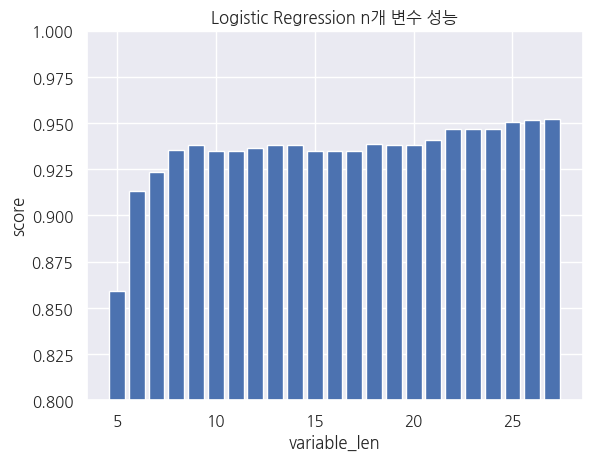

In [65]:
# 막대 그래프 생성
plt.bar(variable1_len, score1)

# 제목과 축 레이블 추가
plt.title('Logistic Regression n개 변수 성능')
plt.xlabel('variable_len')
plt.ylabel('score')
plt.ylim(0.8)

# 그래프 보이기
plt.show()

### (2) 알고리즘2 : Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

* 전체 변수로 Decision Tree 모델 만들기

* 상위 n개 변수로 Decision Tree 모델 만들기

In [67]:
variable2_len = []
score2 = []
for i in range(5, 28, 1):
    temp_train_X2 = train_X2[train_X2.columns[0:i:1]]
    temp_test_X2 = test_X2[test_X2.columns[0:i:1]]

    dt2 = DecisionTreeClassifier()
    dt2.fit(temp_train_X2, train_y2)

    print(f'변수 {i}개일 떄')
    print(f'평가 세트 점수 : {dt2.score(temp_test_X2, test_y2)}')

    variable2_len.append(i)
    score2.append(dt2.score(temp_test_X2, test_y2))

변수 5개일 떄
평가 세트 점수 : 0.892948173322005
변수 6개일 떄
평가 세트 점수 : 0.9413763806287171
변수 7개일 떄
평가 세트 점수 : 0.9439252336448598
변수 8개일 떄
평가 세트 점수 : 0.9379779099405268
변수 9개일 떄
평가 세트 점수 : 0.9405267629566695
변수 10개일 떄
평가 세트 점수 : 0.9532710280373832
변수 11개일 떄
평가 세트 점수 : 0.9532710280373832
변수 12개일 떄
평가 세트 점수 : 0.9600679694137638
변수 13개일 떄
평가 세트 점수 : 0.9515717926932881
변수 14개일 떄
평가 세트 점수 : 0.9566694987255735
변수 15개일 떄
평가 세트 점수 : 0.9498725573491928
변수 16개일 떄
평가 세트 점수 : 0.9464740866610025
변수 17개일 떄
평가 세트 점수 : 0.9541206457094308
변수 18개일 떄
평가 세트 점수 : 0.9549702633814783
변수 19개일 떄
평가 세트 점수 : 0.9507221750212405
변수 20개일 떄
평가 세트 점수 : 0.9524214103653356
변수 21개일 떄
평가 세트 점수 : 0.9524214103653356
변수 22개일 떄
평가 세트 점수 : 0.9549702633814783
변수 23개일 떄
평가 세트 점수 : 0.9575191163976211
변수 24개일 떄
평가 세트 점수 : 0.9515717926932881
변수 25개일 떄
평가 세트 점수 : 0.9600679694137638
변수 26개일 떄
평가 세트 점수 : 0.9541206457094308
변수 27개일 떄
평가 세트 점수 : 0.9566694987255735


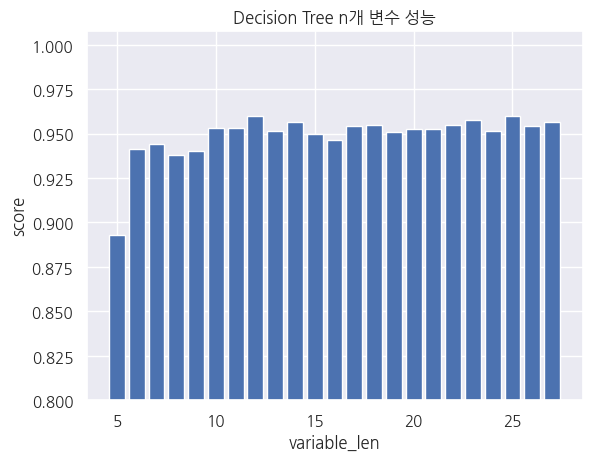

In [68]:
# 막대 그래프 생성
plt.bar(variable2_len, score2)

# 제목과 축 레이블 추가
plt.title('Decision Tree n개 변수 성능')
plt.xlabel('variable_len')
plt.ylabel('score')
plt.ylim(0.8)

# 그래프 보이기
plt.show()

### (3) 알고리즘3 : XGBoost

In [69]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder # Logisitc Regression, Decision Tree와 달리 XGBoost는 분류 문제일 떄, 레이블을 숫자 형태로 기대한다.

* 전체 변수로 XGBoost를 하였다.

* 상위 n개 변수로 XGBoost 한다.

In [70]:
variable3_len = []
score3= []

for i in range(5, 28, 1):
    temp_train_X2 = train_X2[train_X2.columns[0:i:1]]
    temp_test_X2 = test_X2[test_X2.columns[0:i:1]]

    # 레이블 인코더 생성
    le2 = LabelEncoder()

    # 학습 데이터의 레이블을 학습하고 변환
    train_y2_encoded = le2.fit_transform(train_y2)

    # 테스트 데이터의 레이블을 변환 (필요한 경우)
    test_y2_encoded = le2.transform(test_y2)

    # XGBoost 분류기 생성
    xgb2 = xgb.XGBClassifier()

    # 인코딩된 레이블을 사용하여 모델 학습
    xgb2.fit(temp_train_X2, train_y2_encoded)

    print(f'변수 {i}개일 떄')
    print(f'평가 세트 점수 : {xgb2.score(temp_test_X2, test_y2_encoded)}')

    variable3_len.append(i)
    score3.append(xgb2.score(temp_test_X2, test_y2_encoded))

변수 5개일 떄
평가 세트 점수 : 0.9226847918436704
변수 6개일 떄
평가 세트 점수 : 0.9626168224299065
변수 7개일 떄
평가 세트 점수 : 0.9643160577740016
변수 8개일 떄
평가 세트 점수 : 0.9702633814783348
변수 9개일 떄
평가 세트 점수 : 0.9719626168224299
변수 10개일 떄
평가 세트 점수 : 0.9762107051826678
변수 11개일 떄
평가 세트 점수 : 0.9821580288870009
변수 12개일 떄
평가 세트 점수 : 0.9830076465590484
변수 13개일 떄
평가 세트 점수 : 0.9830076465590484
변수 14개일 떄
평가 세트 점수 : 0.9821580288870009
변수 15개일 떄
평가 세트 점수 : 0.9796091758708582
변수 16개일 떄
평가 세트 점수 : 0.9796091758708582
변수 17개일 떄
평가 세트 점수 : 0.9804587935429057
변수 18개일 떄
평가 세트 점수 : 0.9830076465590484
변수 19개일 떄
평가 세트 점수 : 0.9787595581988106
변수 20개일 떄
평가 세트 점수 : 0.9830076465590484
변수 21개일 떄
평가 세트 점수 : 0.9830076465590484
변수 22개일 떄
평가 세트 점수 : 0.9813084112149533
변수 23개일 떄
평가 세트 점수 : 0.9804587935429057
변수 24개일 떄
평가 세트 점수 : 0.9813084112149533
변수 25개일 떄
평가 세트 점수 : 0.983857264231096
변수 26개일 떄
평가 세트 점수 : 0.9813084112149533
변수 27개일 떄
평가 세트 점수 : 0.983857264231096


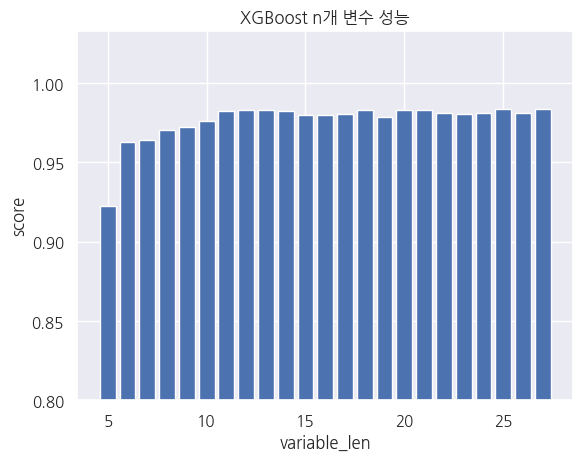

In [71]:
# 막대 그래프 생성
plt.bar(variable3_len, score3)

# 제목과 축 레이블 추가
plt.title('XGBoost n개 변수 성능')
plt.xlabel('variable_len')
plt.ylabel('score')
plt.ylim(0.8)

# 그래프 보이기
plt.show()

### (4) 알고리즘4 : 인공 신경망(Deep Learning)

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

* 딥러닝을 할 떄 특히 분류 문제일 떄
  * Y(Yarget)이 클래스 레이블링을 숫자 형태로 해야 한다고 한다.

* 전체 변수로 딥러닝 한다.

* 상위 n개 변수로 딥러닝 한다.

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
variable4_len = []
score4 = []
for i in range(5, 28, 1):
    temp_train_X2 = train_X2[train_X2.columns[0:i:1]]
    temp_test_X2 = test_X2[test_X2.columns[0:i:1]]

    # 레이블 인코더 생성
    dd2 = LabelEncoder()

    # 학습 데이터의 레이블을 학습하고 변환
    train_y2_encoded = dd2.fit_transform(train_y2)

    # 테스트 데이터의 레이블을 변환 (필요한 경우)
    test_y2_encoded = dd2.transform(test_y2)

    # 딥러닝 구조 설계
    model2 = Sequential()
    model2.add(Dense(128, activation='swish', input_shape=(temp_train_X2.shape[1], )))
    model2.add(Dropout(0.2))
    model2.add(Dense(64, activation='swish'))
    model2.add(Dropout(0.2))
    model2.add(Dense(32, activation='swish'))
    model2.add(Dropout(0.2))
    model2.add(Dense(6, activation='softmax'))

    model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 딥러닝 모델 학습
    model2.fit(temp_train_X2, train_y2_encoded, epochs=10, batch_size=32, validation_split=0.2)

    # 예측값 추출하기
    y_pred = np.argmax(model2.predict(temp_test_X2), axis=1)

    print(f'변수 {i}개일 떄')
    print('accuracy_score : ', accuracy_score(test_y2_encoded, y_pred)) # 실제값과 예측값 비교를 통해 정확도 도출

    variable4_len.append(i)
    score4.append(accuracy_score(test_y2_encoded, y_pred))

Epoch 1/10
118/118 [==============================] - 2s 5ms/step - loss: 0.9470 - accuracy: 0.6652 - val_loss: 0.5147 - val_accuracy: 0.7620
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7409 - val_loss: 0.4606 - val_accuracy: 0.7630
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7624 - val_loss: 0.4558 - val_accuracy: 0.7938
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.7627 - val_loss: 0.4393 - val_accuracy: 0.7790
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4405 - accuracy: 0.7752 - val_loss: 0.4497 - val_accuracy: 0.7938
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.7635 - val_loss: 0.4380 - val_accuracy: 0.7768
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.7770 - val_loss: 0.4135 - val_accuracy: 0.7906
Epoch 

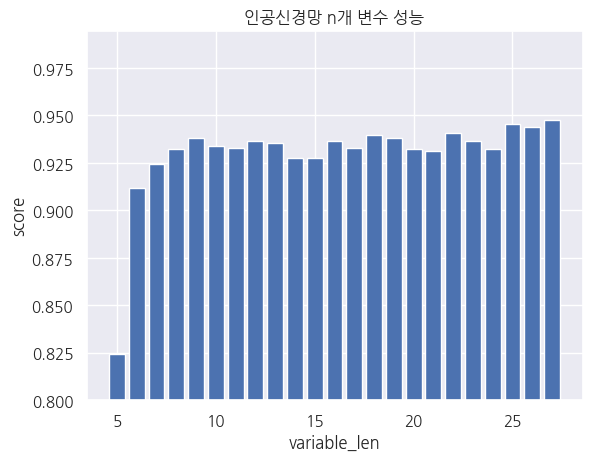

In [75]:
# 막대 그래프 생성
plt.bar(variable4_len, score4)

# 제목과 축 레이블 추가
plt.title('인공신경망 n개 변수 성능')
plt.xlabel('variable_len')
plt.ylabel('score')
plt.ylim(0.8)

# 그래프 보이기
plt.show()

### (4) 알고리즘5 : Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
variable5_len = []
score5 = []
for i in range(5, 28, 1):
    temp_train_X2 = train_X2[train_X2.columns[0:i:1]]
    temp_test_X2 = test_X2[test_X2.columns[0:i:1]]

    rf = RandomForestClassifier()
    rf.fit(temp_train_X2, train_y2)

    print(f'변수 {i}개일 떄')
    print(f'평가 세트 점수 : {rf.score(temp_test_X2, test_y2)}')

    variable5_len.append(i)
    score5.append(rf.score(temp_test_X2, test_y2))

변수 5개일 떄
평가 세트 점수 : 0.9269328802039083
변수 6개일 떄
평가 세트 점수 : 0.9592183517417162
변수 7개일 떄
평가 세트 점수 : 0.9609175870858114
변수 8개일 떄
평가 세트 점수 : 0.9694137638062872
변수 9개일 떄
평가 세트 점수 : 0.9745114698385726
변수 10개일 떄
평가 세트 점수 : 0.9804587935429057
변수 11개일 떄
평가 세트 점수 : 0.9787595581988106
변수 12개일 떄
평가 세트 점수 : 0.9779099405267629
변수 13개일 떄
평가 세트 점수 : 0.9779099405267629
변수 14개일 떄
평가 세트 점수 : 0.9804587935429057
변수 15개일 떄
평가 세트 점수 : 0.9813084112149533
변수 16개일 떄
평가 세트 점수 : 0.9779099405267629
변수 17개일 떄
평가 세트 점수 : 0.9770603228547153
변수 18개일 떄
평가 세트 점수 : 0.9753610875106202
변수 19개일 떄
평가 세트 점수 : 0.9779099405267629
변수 20개일 떄
평가 세트 점수 : 0.9813084112149533
변수 21개일 떄
평가 세트 점수 : 0.9787595581988106
변수 22개일 떄
평가 세트 점수 : 0.9770603228547153
변수 23개일 떄
평가 세트 점수 : 0.9796091758708582
변수 24개일 떄
평가 세트 점수 : 0.9813084112149533
변수 25개일 떄
평가 세트 점수 : 0.9787595581988106
변수 26개일 떄
평가 세트 점수 : 0.9762107051826678
변수 27개일 떄
평가 세트 점수 : 0.9796091758708582


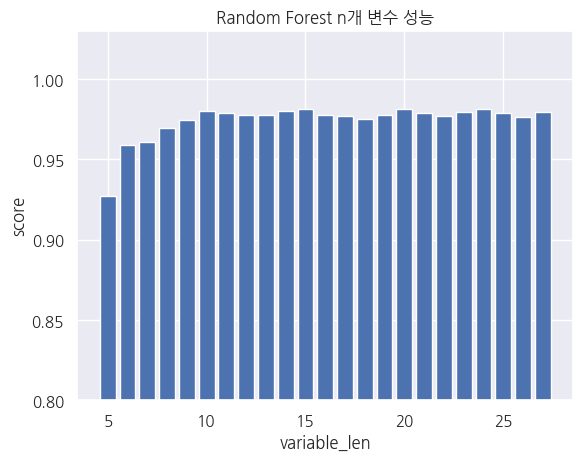

In [78]:
# 막대 그래프 생성
plt.bar(variable5_len, score5)

# 제목과 축 레이블 추가
plt.title('Random Forest n개 변수 성능')
plt.xlabel('variable_len')
plt.ylabel('score')
plt.ylim(0.8)

# 그래프 보이기
plt.show()

### (5) 알고리즘6 : HistGradientBoosting

In [79]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [80]:
variable6_len = []
score6 = []
for i in range(5, 28, 1):
    temp_train_X2 = train_X2[train_X2.columns[0:i:1]]
    temp_test_X2 = test_X2[test_X2.columns[0:i:1]]

    # 모델 생성 및 훈련
    hgb = HistGradientBoostingClassifier(random_state=42)
    hgb.fit(temp_train_X2, train_y2)

    print(f'변수 {i}개일 떄')
    print(f'평가 세트 점수 : {hgb.score(temp_test_X2, test_y2)}')

    variable6_len.append(i)
    score6.append(hgb.score(temp_test_X2, test_y2))

변수 5개일 떄
평가 세트 점수 : 0.9226847918436704
변수 6개일 떄
평가 세트 점수 : 0.9660152931180969
변수 7개일 떄
평가 세트 점수 : 0.9711129991503823
변수 8개일 떄
평가 세트 점수 : 0.9745114698385726
변수 9개일 떄
평가 세트 점수 : 0.9779099405267629
변수 10개일 떄
평가 세트 점수 : 0.983857264231096
변수 11개일 떄
평가 세트 점수 : 0.9864061172472387
변수 12개일 떄
평가 세트 점수 : 0.9881053525913339
변수 13개일 떄
평가 세트 점수 : 0.9847068819031436
변수 14개일 떄
평가 세트 점수 : 0.9881053525913339
변수 15개일 떄
평가 세트 점수 : 0.9813084112149533
변수 16개일 떄
평가 세트 점수 : 0.9813084112149533
변수 17개일 떄
평가 세트 점수 : 0.9821580288870009
변수 18개일 떄
평가 세트 점수 : 0.9821580288870009
변수 19개일 떄
평가 세트 점수 : 0.9830076465590484
변수 20개일 떄
평가 세트 점수 : 0.9855564995751912
변수 21개일 떄
평가 세트 점수 : 0.9855564995751912
변수 22개일 떄
평가 세트 점수 : 0.983857264231096
변수 23개일 떄
평가 세트 점수 : 0.9847068819031436
변수 24개일 떄
평가 세트 점수 : 0.9830076465590484
변수 25개일 떄
평가 세트 점수 : 0.9855564995751912
변수 26개일 떄
평가 세트 점수 : 0.9855564995751912
변수 27개일 떄
평가 세트 점수 : 0.983857264231096


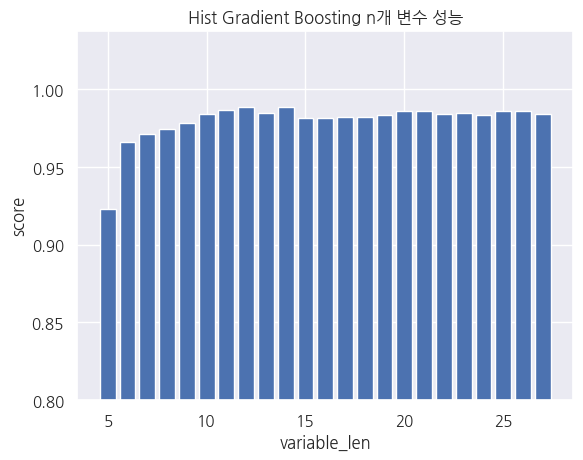

In [81]:
# 막대 그래프 생성
plt.bar(variable6_len, score6)

# 제목과 축 레이블 추가
plt.title('Hist Gradient Boosting n개 변수 성능')
plt.xlabel('variable_len')
plt.ylabel('score')
plt.ylim(0.8)

# 그래프 보이기
plt.show()

* Logisitc Regression, Decision Tree, XGBoost, 인공신경망, Random Forest, HistGradientBoosting 애서 제일 좋은 성능을 보였던 것을 모아 그래프로 모은다.

In [82]:
algorithms = ['Logistic Regression', 'Decision Tree', 'XGBoost', '인공신경망', 'Random Forest', 'HistGradientBoosting']
best_score = [max(score1), max(score2), max(score3), max(score4), max(score5), max(score6)]

In [83]:
best_score

[0.9524214103653356,
 0.9600679694137638,
 0.983857264231096,
 0.9473237043330501,
 0.9813084112149533,
 0.9881053525913339]

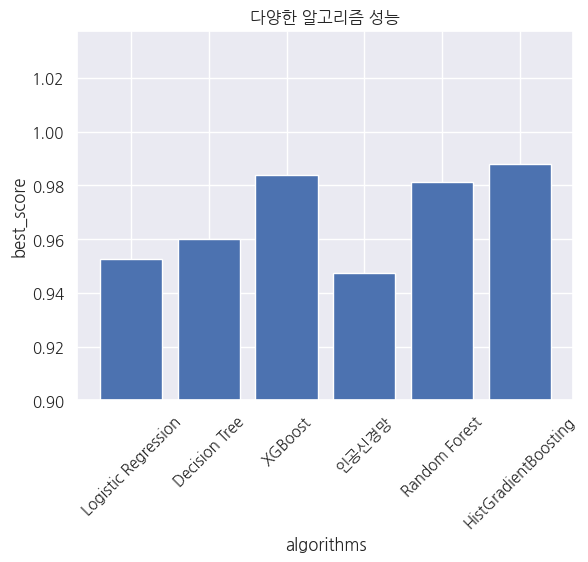

In [84]:
# 막대 그래프 생성
plt.bar(algorithms, best_score)

# 제목과 축 레이블 추가
plt.title('다양한 알고리즘 성능')
plt.xlabel('algorithms')
plt.ylabel('best_score')
plt.xticks(rotation=45)
plt.ylim(0.9)

# 그래프 보이기
plt.show()